# IE-456 Project Group 9
Alican Yılmaz(2016402093) 

Gökay Besler(2016402108)
#### 1. Algorithms
##### 1.1 Havel-Hakimi Algorithm
##### 1.2 Pairing Model
##### 1.3 Sequential Algorithm
#### 2. Visualization of the Graphs
#### 3. Running Algorithms
#### Appendix- Generating Test Degree Sequences

In [147]:
#Libraries
import numpy as np
import time
import networkx as nx
import matplotlib.pyplot as plt
import random 
from random import sample
from numpy.random import choice
import copy


# 1. ALGORITHMS

### 1.1 HAVEL-HAKIMI ALGORITHM 

In [148]:
'''
input: deg_seq (A list of degree sequences e.g., [3,2,2,1]) 
output: false (if the degree sequence is not graphical.) 
        adjacency matrix: a dictionary of adjaceny matrix e.g. {1:[2,3],2:[1,3],3:[1,2]}
'''
def HavelHakimi(deg_seq):        
    deg_seq = np.array(deg_seq)
    labels = np.arange(len(deg_seq))+1
    adj_list = {}
    if sum(deg_seq)%2!=0: #Handshaking lemma
        return False
    while True:
        indices = np.argsort(-deg_seq) #sorts the degree sequence at each step
        deg_seq = deg_seq[indices]
        labels = labels[indices]
        if all(deg_seq == 0):  # if all degrees are zero while loop terminates
            return adj_list     
        v = deg_seq[0]         # choose the highest degree vertex       
        if v > len(deg_seq[1:]): # if the degree is greater than the rest of the sequence then it is not graphical
            return False             
        for i in range(1,v+1): # update degree sequence
            deg_seq[i] -= 1
            if deg_seq[i] < 0: # if any degree is smaller than 0, then it is not graphical
                return False
            adj_list[labels[0]] = adj_list.get(labels[0], []) + [labels[i]] # update adjacency matrix. 
            adj_list[labels[i]]= adj_list.get(labels[i], [])+[labels[0]]
        deg_seq[0] = 0            #update the highest degree vertex to 0.
    return False     

# credit :https://stackoverflow.com/questions/67128384/trouble-with-havel-hakimi-algorithm

### 1.2 Pairing Model

In [161]:
# Helper Functions
'''
input: deg_seq  (A list of sequence)
output: a list of 2 points chosen randomly 
'''
def random_select(seq):  
    pts=sample(seq,2) 
    return pts #returns pts as list

'''
input: point and a degree sequence.
output: corresponding vertex of the point given degree sequence
'''
def find_the_vertex(point, deg_seq):
    rem=point
    index=-1
    for deg in deg_seq:
        rem-=deg
        index+=1
        if rem<0:
            return index 



'''
input: deg_seq  (A list of sequence)
output: false (if the degree sequence is not graphical.) 
        true (if the degree sequene is graphical.)
'''
def Havel_Hakimi(deg_seq):   #Havel-Hakimi for graphicality check (no need to adjacency matrix)
    
    deg_seq = np.array(deg_seq)
    labels = np.arange(len(deg_seq))+1
    adj_list = {}
    if sum(deg_seq)%2!=0: #Handshaking lemma
        return False
    while True:
        indices = np.argsort(-deg_seq)
        deg_seq = deg_seq[indices]
        labels = labels[indices]
        if all(deg_seq == 0):
            return True     
        v = deg_seq[0]            
        if v > len(deg_seq[1:]):
            return False             
        for i in range(1,v+1):
            deg_seq[i] -= 1
            if deg_seq[i] < 0:
                return False
        deg_seq[0] = 0            
    return False

################################################################################
'''
input: deg_seq  (A list of sequence)
output: false(if the degree sequence is not graphical.) 
        adjacency matrix (if the degree sequence is graphical.)
'''

def pairingModel(deg_seq):
    
    if sum(deg_seq)%2!=0: #Handshaking lemma
        return False
    if Havel_Hakimi(deg_seq)==False: #checks graphicality of the degree sequence
        return False
#initialization 

    unmatched=[i for i in range(sum(deg_seq))] #to keep track of unmatched points

    set_of_edges=[] #to keep track of matched edges
    
    adjacency_matrix={index: [] for index in range(1,len(deg_seq)+1)} # output    
    
    start_time = time.time() #end the loop if time exceeds
    
    while True:
        pts=random_select(unmatched) # randomly selects two points from unmatched list
        unmatched.remove(pts[0])      #updates unmatched points list
        unmatched.remove(pts[1])
        
        vertex_1=find_the_vertex(pts[0],deg_seq)  # finds the points' corresponding vertices.
        vertex_2=find_the_vertex(pts[1],deg_seq) 
        
        
        
        adjacency_matrix[vertex_1+1].append(vertex_2+1) #updates adjacency matrix (+1 due to indexing)
        adjacency_matrix[vertex_2+1].append(vertex_1+1) 
        

            
        if [vertex_1,vertex_2] in set_of_edges or [vertex_2,vertex_1] in set_of_edges: # multigraph check
            unmatched=[i for i in range(sum(deg_seq))] #all values are initialized
            adjacency_matrix={index: [] for index in range(1,len(deg_seq)+1)}
            set_of_edges=[]
        else:
            set_of_edges.append([vertex_1,vertex_2]) #updates the set of edges list
        if vertex_1==vertex_2: # loop check
            unmatched=[i for i in range(sum(deg_seq))] #all values are initialized
            adjacency_matrix={index: [] for index in range(1,len(deg_seq)+1)}
            set_of_edges=[]
            
        if (len(unmatched) == 0): #if all degress are zero while loop terminates and returns the adjacency matrix
            return adjacency_matrix
    
        if (time.time() - start_time)>300: # end the loop if time limit exceeds
            print("Time limit (300s) exceeded")
            return False
    
    

    
    

### 1.3 Sequential Algorithm

In [150]:
# Helper Functions
'''
input: deg_seq  (A list of sequence)
output: False(if the degree sequence is not graphical.) 
        True (if the degree sequence is graphical.)
'''
def Erdos_Gallai(deg_seq): #checking graphicality with Erdos_Gallai
    new_deg=copy.deepcopy(deg_seq)
    if sum(new_deg)%2!=0: #Handshaking lemma
        return False
    new_deg.sort(reverse=True)
    n=len(new_deg)
    for k in range(1,n+1):
        if sum(new_deg[0:k])>k*(k-1)+sum([min(k,new_deg[i]) for i in range(k,n)]): # (EG Criterion)
            return False
    return True

'''
input: deg_seq  (A list of sequence), index i and index j that will be updated
output: updated degree sequence.
'''

def negative_update(deg_seq,i,j):
        new_deg=copy.deepcopy(deg_seq)
        new_deg[i]-=1
        new_deg[j]-=1
        return new_deg

    
'''
input: deg_seq  (A list of sequence), index i, set of edges E
output: candidate list
'''    
    
def compute_candidate_list(E,i,deg_seq):
    new_deg=copy.deepcopy(deg_seq)

    # j is in candidate list if edge (i,j) not in E,if negatively updated sequence is still graphical, if i not equal j and if its degree is positive. 
    candidate_list=[j for j in range(len(new_deg)) if i!=j and [i,j] not in E and [j,i] not in E and Erdos_Gallai(negative_update(new_deg,i,j)) and new_deg[j]>0]       

    return candidate_list

'''
input: candidate list J and degree sequence
output: chosen vertex that will be connected.
'''   
def pick_j(J,deg_seq):
    j_deg=[deg_seq[i] for i in J]
    selection_prob=[j/sum(j_deg) for j in j_deg]
    j=int(choice(J, 1, p=selection_prob))
    
    return j

###################################################################################
'''
input: degree sequence
output:false (if the degree sequence is not graphical)
       adjacency matrix(if the degree sequence is graphical)
'''  
def sequential_algoritm(deg_seq):
    if sum(deg_seq)%2!=0: #Handshaking lemma
        return False
    if Erdos_Gallai(deg_seq)==False: # checking graphicality of degree sequence
        return False
    #initialization
    adjacency_matrix={index: [] for index in range(1,len(deg_seq)+1)}
    E=[]
    
    while True:
        i=deg_seq.index(min([i for i in deg_seq if i > 0])) #Choose the least i with di a minimal positive entry.
        
        while deg_seq[i]>0:


            J_list=compute_candidate_list(E,i,deg_seq) # Compute candidate list J 

            
            j=pick_j(J_list,deg_seq) #Pick j ∈ J with probability proportional to its degree in d.
           
            deg_seq=negative_update(deg_seq,i,j) #update degree sequence

            E.append([i,j]) #update edge list
            
            adjacency_matrix[i+1].append(j+1) #update adjacency matrix
            adjacency_matrix[j+1].append(i+1)
            
        if sum(deg_seq)==0: # if all degrees equal 0 while loop terminated and returns adjacency matrix

            return adjacency_matrix
        
    
    
    
    

# 2. Visualization 

The graph with [5, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3] can be drawn


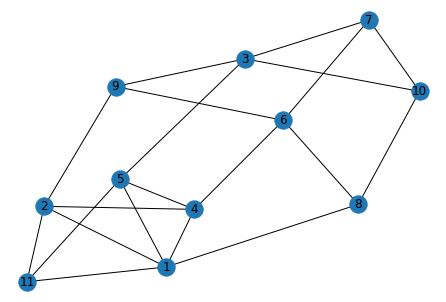

The graph with [6, 3, 3, 3, 3, 2, 2, 2, 2, 2, 1, 1] can be drawn


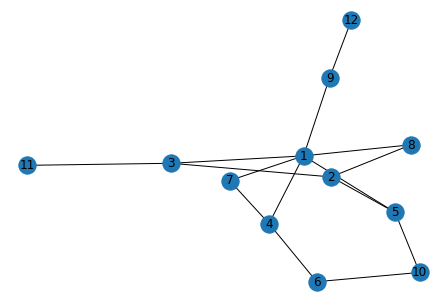

The graph with [4, 3, 2, 1] can't be drawn
The graph with [3, 3, 3, 3] can be drawn


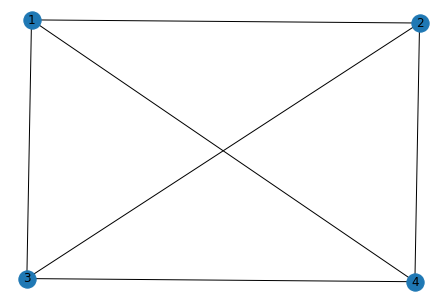

In [151]:
def visualize_graph(adjacency_matrix,deg_seq):
    if adjacency_matrix:
        print('The graph with {} can be drawn'.format(deg_seq))
        G = nx.from_dict_of_lists(adjacency_matrix)
        nx.draw(G, pos=nx.spring_layout(G), with_labels=True)
        plt.show()
    else:
        print('The graph with {} can\'t be drawn'.format(deg_seq))    
    return None

deg_seqs = [[5, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3], 
            [6, 3, 3, 3, 3, 2, 2, 2, 2, 2,1,1],
            [4,3,2,1],
            [3, 3, 3, 3]]

for deg_seq in deg_seqs:
    adjacency_matrix = sequential_algoritm(deg_seq)
    visualize_graph(adjacency_matrix,deg_seq)

# 3. Running Algorithms

In [152]:
def read_input(path): 
    with open(path, 'r') as f:
        lists = [list(int(x) for x in line.strip().split()) for line in f ] 
    deg_seq=lists[1]
    f.close()
    return deg_seq


def write_output(path,adjacency_matrix): 
    fout = path 
    fo = open(fout, "w")
    if adjacency_matrix:
        fo.write(str(len(adjacency_matrix))+"\n")
        for v in adjacency_matrix.values():
            for i in v:
                fo.write(str(i) +' ')
            fo.write("\n")
    else:
          fo.write("0")  
    fo.close()
    return None



In [162]:
import glob
from pathlib import Path

#######
#  change only path of the folder. This section prints the running time of the algorithms for each input and writes
# the adjacency matrix to output files in the same folder.
#######

path="/Users/alicanyilmaz/Desktop/" # enter the path of the folder
list_of_files = glob.glob(path+"IE 456 Project/input_files/*") 


for input_file in list_of_files:
    deg_seq=read_input(input_file)
    #HAVEL HAKIMI
    start_time = time.time()
    output1=HavelHakimi(deg_seq)
    P=Path(input_file) 
    input_index=P.name[-11:-9] # get the input index
    print("---HH takes %s seconds for input %s ---" % ((time.time() - start_time),input_index))
    write_output(path+"IE 456 Project/output_files/"+"O-09-"+str(len(deg_seq))+"-"+str(input_index)+str("-HH"),output1)
    
    #Sequential Algorithm
    start_time = time.time()
    output2=sequential_algoritm(deg_seq)
    P=Path(input_file) 
    input_index=P.name[-11:-9] # get the input index
    print("---SA takes %s seconds for input %s ---" % ((time.time() - start_time),input_index))

    write_output(path+"IE 456 Project/output_files/"+"O-09-"+str(len(deg_seq))+"-"+str(input_index)+str("-SA"),output2)
    #PM
    start_time = time.time()
    output3=pairingModel(deg_seq)
    P=Path(input_file) 
    input_index=P.name[-11:-9] # get the input index
    print("---PM takes %s seconds for input %s ---" % ((time.time() - start_time),input_index))
    write_output(path+"IE 456 Project/output_files/"+"O-09-"+str(len(deg_seq))+"-"+str(input_index)+str("-PM"),output3)




    


---HH takes 0.0048220157623291016 seconds for input 12 ---
---SA takes 25.10773801803589 seconds for input 12 ---
Time limit (600s) exceeded
---PM takes 300.00184774398804 seconds for input 12 ---
---HH takes 0.0016918182373046875 seconds for input 13 ---
---SA takes 21.94202709197998 seconds for input 13 ---
Time limit (600s) exceeded
---PM takes 300.00103092193604 seconds for input 13 ---
---HH takes 0.0006108283996582031 seconds for input 37 ---
---SA takes 1.1379070281982422 seconds for input 37 ---
---PM takes 0.03199005126953125 seconds for input 37 ---
---HH takes 0.0004401206970214844 seconds for input 36 ---
---SA takes 1.11965012550354 seconds for input 36 ---
---PM takes 0.31729626655578613 seconds for input 36 ---
---HH takes 0.0004668235778808594 seconds for input 40 ---
---SA takes 1.0964548587799072 seconds for input 40 ---
---PM takes 0.01831507682800293 seconds for input 40 ---
---HH takes 0.0002770423889160156 seconds for input -1 ---
---SA takes 0.04470014572143555 s

Time limit (600s) exceeded
---PM takes 300.0006380081177 seconds for input -6 ---
---HH takes 0.00040984153747558594 seconds for input 61 ---
---SA takes 0.05242300033569336 seconds for input 61 ---
---PM takes 1.431246042251587 seconds for input 61 ---
---HH takes 0.0001289844512939453 seconds for input 85 ---
---SA takes 1.6927719116210938e-05 seconds for input 85 ---
---PM takes 1.0013580322265625e-05 seconds for input 85 ---
---HH takes 5.888938903808594e-05 seconds for input 84 ---
---SA takes 1.4066696166992188e-05 seconds for input 84 ---
---PM takes 1.3113021850585938e-05 seconds for input 84 ---
---HH takes 0.0002548694610595703 seconds for input 17 ---
---SA takes 0.05347299575805664 seconds for input 17 ---
---PM takes 125.79559874534607 seconds for input 17 ---
---HH takes 0.0003151893615722656 seconds for input 16 ---
---SA takes 0.04694390296936035 seconds for input 16 ---
---PM takes 1.1402511596679688 seconds for input 16 ---
---HH takes 0.0012049674987792969 seconds fo

## Appendix: Generating Input Degree Sequences

Below,three functions to generate some general graph types are given. With the functions below, scale-free graphs, random(Erdos-Renyi) graphs and k-regular graphs can be generated. Each function returns degree sequence, which later to be used in HH, Pairing and Sequential Algorithm functions.

This part can be used for further studies

In [153]:
# This function creates scale_free graphs using preferential attachment idea, with n vertices. 
# Input: n: number of vertices in the graph 
#        m: starting vertices.
# Source: https://stackoverflow.com/questions/58739785/scale-free-network-using-preferential-attachment-algorithm

def scale_free(n,m):
    if m < 1 or  m >=n: 
        raise nx.NetworkXError("Preferential attactment algorithm must have m >= 1"
                               " and m < n, m = %d, n = %d" % (m, n)) 
    # Add m initial nodes (m0 in barabasi-speak)
    G=nx.empty_graph(m)

    # Target nodes for new edges
    targets=list(range(m))
    # List of existing nodes, with nodes repeated once for each adjacent edge
    repeated_nodes=[]
    # Start adding the other n-m nodes. The first node is m.
    source=m
    while source<n:
        # Add edges to m nodes from the source.
        G.add_edges_from(zip([source]*m,targets))
        # Add one node to the list for each new edge just created.
        repeated_nodes.extend(targets)
        # And the new node "source" has m edges to add to the list.
        repeated_nodes.extend([source]*m)
        # Now choose m unique nodes from the existing nodes
        # Pick uniformly from repeated_nodes (preferential attachement)
        targets = sample(repeated_nodes,m)
        source += 1
    degree_sequence = [d for n, d in G.degree()]
    return degree_sequence



# Creates degree sequence random graphs with each has probability p to be connected. Thus, mean degree equals n*p.
# Implementation of Erdos-Renyi Model on a Social Network
#Source: https://www.geeksforgeeks.org/implementation-of-erdos-renyi-model-on-social-networks/
def Erdos_Renyi_random_graph_generation(N,P):
    # Create an empty graph object
    g = nx.Graph()
    # Adding nodes
    g.add_nodes_from(range(1, N + 1))
    
    # Add edges to the graph randomly.
    for i in g.nodes():
        for j in g.nodes():
            if (i < j):

                # Take random number R.
                R = random.random()

                # Check if R<P add the edge to the graph else ignore.
                if (R < P):
                    g.add_edge(i, j)
        pos = nx.circular_layout(g)
    degree_sequence = [d for n, d in g.degree()]
    return degree_sequence




# Creates degree sequence of k_regular graphs of n vertices
def k_regular_graphs(n,k):
    s=[k for i in range(n)]
    return s  

In [154]:
# scale-free generation
i=1
for x in range(1,6):
    s=scale_free(20,4)
    f = open("09-"+str(len(s))+"-"+str(i)+"-Computer", 'w')
    f.write("%s\n" % len(s))
    for item in s:
        f.write("%s " % item) 
    f.close()
    i+=1
for x in range(1,6):
    s=scale_free(50,4)
    f = open("09-"+str(len(s))+"-"+str(i)+"-Computer", 'w')
    f.write("%s\n" % len(s))
    for item in s:
        f.write("%s " % item) 
    f.close()    
    i+=1
for x in range(1,6):
    s=scale_free(100,4)
    f = open("09-"+str(len(s))+"-"+str(i)+"-Computer", 'w')
    f.write("%s\n" % len(s))
    for item in s:
        f.write("%s " % item) 
    f.close()
    i+=1

In [155]:
# erdos renyi generation(mean 6)
for x in range(1,6):
    s=Erdos_Renyi_random_graph_generation(20,.3)
    f = open("09-"+str(len(s))+"-"+str(i)+"-Computer", 'w')
    f.write("%s\n" % len(s))
    for item in s:
        f.write("%s " % item) 
    f.close()
    i+=1

for x in range(1,6):    
    s=Erdos_Renyi_random_graph_generation(50,.12)
    f = open("09-"+str(len(s))+"-"+str(i)+"-Computer", 'w')
    f.write("%s\n" % len(s))
    for item in s:
        f.write("%s " % item) 
    f.close()    
    i+=1

for x in range(1,6):        
    s=Erdos_Renyi_random_graph_generation(100,.06)
    f = open("09-"+str(len(s))+"-"+str(i)+"-Computer", 'w')
    f.write("%s\n" % len(s))
    for item in s:
        f.write("%s " % item) 
    f.close()
    i+=1
    
# erdos renyi generation(mean 4)

for x in range(1,6):
    s=Erdos_Renyi_random_graph_generation(20,.2)
    f = open("09-"+str(len(s))+"-"+str(i)+"-Computer", 'w')
    f.write("%s\n" % len(s))
    for item in s:
        f.write("%s " % item) 
    f.close()
    i+=1
for x in range(1,6):
    s=Erdos_Renyi_random_graph_generation(50,.08)
    f = open("09-"+str(len(s))+"-"+str(i)+"-Computer", 'w')
    f.write("%s\n" % len(s))
    for item in s:
        f.write("%s " % item) 
    f.close()    
    i+=1
    
for x in range(1,6):
    s=Erdos_Renyi_random_graph_generation(100,.04)
    f = open("09-"+str(len(s))+"-"+str(i)+"-Computer", 'w')
    f.write("%s\n" % len(s))
    for item in s:
        f.write("%s " % item) 
    f.close()
    i+=1

In [157]:
#generation of k-regular graphs(3)
for x in range(1,6):
    s=k_regular_graphs(20,3)
    f = open("09-"+str(len(s))+"-"+str(i)+"-Computer", 'w')
    f.write("%s\n" % len(s))
    for item in s:
        f.write("%s " % item) 
    f.close()
    i+=1

for x in range(1,6):
    s=k_regular_graphs(50,3)
    f = open("09-"+str(len(s))+"-"+str(i)+"-Computer", 'w')
    f.write("%s\n" % len(s))
    for item in s:
        f.write("%s " % item) 
    f.close()    
    i+=1
for x in range(1,6):
    s=k_regular_graphs(100,3)
    f = open("09-"+str(len(s))+"-"+str(i)+"-Computer", 'w')
    f.write("%s\n" % len(s))
    for item in s:
        f.write("%s " % item) 
    f.close()
    i+=1

#generation of k-regular graphs(6)

for x in range(1,6):
    s=k_regular_graphs(20,6)
    f = open("09-"+str(len(s))+"-"+str(i)+"-Computer", 'w')
    f.write("%s\n" % len(s))
    for item in s:
        f.write("%s " % item) 
    f.close()
    i+=1
    
for x in range(1,6):
    s=k_regular_graphs(50,6)
    f = open("09-"+str(len(s))+"-"+str(i)+"-Computer", 'w')
    f.write("%s\n" % len(s))
    for item in s:
        f.write("%s " % item) 
    f.close()    
    i+=1
    
for x in range(1,6):
    s=k_regular_graphs(100,6)
    f = open("09-"+str(len(s))+"-"+str(i)+"-Computer", 'w')
    f.write("%s\n" % len(s))
    for item in s:
        f.write("%s " % item) 
    f.close()
    i+=1

### Generating non-graphical degree sequences

In [158]:
# This function generates random degrees with binomial distribution
def Erdos_Renyi_random_graph_generation(n,p):
    s = np.random.binomial(n,p,n) #mean=lambda=np
    return list(s)

In [159]:
count=0
non_graphical=[]
# even sum (Satisfies Handshaking Lemma)
while count<7:
    s=Erdos_Renyi_random_graph_generation(20,0.8)
    if Havel_Hakimi(s) == False and sum(s)%2==0:
        non_graphical.append(s)
        count+=1
# odd sum (does not satisfy HandShaking Lemma)        
count=0
while count<3:
    s=Erdos_Renyi_random_graph_generation(20,0.8)
    if Havel_Hakimi(s) == False and sum(s)%2!=0:
        non_graphical.append(s)
        count+=1

In [160]:
for degs in non_graphical:
    f = open("09-"+str(len(degs))+"-"+str(i)+"-Computer", 'w')
    f.write("%s\n" % len(degs))
    for item in degs:
        f.write("%s " % item) 
    f.close()
    i+=1